# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

❓ Can you summarize what each metric measures in one sentence?

❓ What data / or type of data do you need for each metric ? 

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [9]:
dff = pd.read_csv('data/db_customers.csv')

In [10]:
df = dff.drop("Unnamed: 0", axis = 1)

❓ Which features should be formated in datetime ? 
Convert them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       105383 non-null  object 
 1   customer_id                    105383 non-null  object 
 2   order_status                   105383 non-null  object 
 3   order_purchase_timestamp       105383 non-null  object 
 4   order_delivered_customer_date  102224 non-null  object 
 5   payment_type                   105382 non-null  object 
 6   payment_installments           105382 non-null  float64
 7   payment_value                  105382 non-null  float64
 8   review_score                   105383 non-null  int64  
 9   customer_unique_id             105383 non-null  object 
 10  customer_zip_code_prefix       105383 non-null  int64  
 11  customer_city                  105383 non-null  object 
 12  customer_state                

In [13]:
df.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
count,105383,105383,105383,105383,102224,105382,105382.000000,105382.000000,105383.000000,105383,105383.000000,105383,105383,102973
unique,99441,99441,8,98875,95664,5,NaN,NaN,NaN,96096,NaN,4119,27,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-14 12:46:18,credit_card,NaN,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,bed_bath_table
freq,42,42,102225,42,42,77844,NaN,NaN,NaN,54,NaN,16483,44245,10150
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.866571,154.617262,4.059848,NaN,35075.237961,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.700955,217.261585,1.367602,NaN,29759.375548,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,1003.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,56.930000,4.000000,NaN,11349.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,100.120000,5.000000,NaN,24360.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,172.847500,5.000000,NaN,58423.000000,NaN,NaN,NaN


In [14]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features are Categorical ? List the unique values on these features.

In [16]:
cat = df[["order_status","payment_type", "review_score", "customer_city", "customer_state", "product_category_name_english"]]
cat

,order_status,payment_type,review_score,customer_city,customer_state,product_category_name_english
0,delivered,credit_card,4,sao paulo,SP,housewares
1,delivered,voucher,4,sao paulo,SP,housewares
2,delivered,voucher,4,sao paulo,SP,housewares
3,delivered,boleto,4,barreiras,BA,perfumery
4,delivered,credit_card,5,vianopolis,GO,auto
...,...,...,...,...,...,...
105378,delivered,credit_card,5,sao jose dos campos,SP,health_beauty
105379,delivered,credit_card,4,praia grande,SP,baby
105380,delivered,credit_card,5,nova vicosa,BA,home_appliances_2
105381,delivered,credit_card,2,japuiba,RJ,computers_accessories


In [23]:
for i in cat :
    print(i)
    print(cat[f"{i}"].value_counts())
    print()
    

order_status
delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

payment_type
credit_card    77844
boleto         20066
voucher         5923
debit_card      1546
not_defined        3
Name: payment_type, dtype: int64

review_score
5    60230
4    20173
1    12719
3     8756
2     3505
Name: review_score, dtype: int64

customer_city
sao paulo           16483
rio de janeiro       7317
belo horizonte       2918
brasilia             2225
curitiba             1590
                    ...  
marques de souza        1
alto piquiri            1
candido godoi           1
joaquim pires           1
nova vicosa             1
Name: customer_city, Length: 4119, dtype: int64

customer_state
SP    44245
RJ    13744
MG    12286
RS     5792
PR     5324
SC     3797
BA     3656
DF     2236
GO     2157
ES     2129
PE     1747
CE     1410
PA     1023
MT 

❓ Check for missing values. What do you notice ? 


In [24]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

In [43]:
df[df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
361,d7f4e2f755cf2f40aa7c39804cfe01c4,18ad705482141f60ad05945506ef2b9e,delivered,2017-11-26 12:50:56,2017-12-08 17:02:43,voucher,1.0,30.22,5,37d2d1ac62901f9a36cff32ca86c9337,38400,uberlandia,MG,sports_leisure
435,ac7a92560a9e99f0a0ab4988102f491b,6abf781c5304890987047e9aa239caa8,delivered,2018-03-04 15:58:09,2018-03-22 23:44:33,credit_card,6.0,107.87,1,a176838867d89ed62981cdf02b7ca3e1,86040,londrina,PR,bed_bath_table
592,7845a2492ab1b4f2cf3d56c7b8da1446,386e96046ce0e77e5c9a9a4e818da93c,delivered,2018-01-18 12:35:45,2018-01-23 21:51:48,debit_card,1.0,44.09,5,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,furniture_decor
656,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,NaN,credit_card,4.0,96.01,1,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,furniture_decor
712,acbe07f22f29ad7e5a78f30008cc6ec7,b4afeb58ac51bc903c5362286c6a5cfe,delivered,2017-11-18 14:33:04,2017-11-29 17:58:43,credit_card,2.0,124.12,5,6457b2cb5462c1217e8e6d36b0ff39d2,5842,sao paulo,SP,drinks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104938,f4e88b3ce1eb899d388467aa702fdf93,4a1435c406b7c8bf1404a88a197787b4,delivered,2017-02-12 18:14:57,2017-02-20 13:15:29,voucher,1.0,18.92,5,39b56719c0ea74b79ee77758001eb6ab,13566,sao carlos,SP,sports_leisure
104942,76de574e14e58baded25a12dce8075c1,3dc99b2fcf41c0898cfc7f38c2fefe5e,delivered,2017-06-18 10:26:33,2017-06-22 16:04:05,credit_card,8.0,105.38,5,970e5961383615662043afa2d9c68802,30880,belo horizonte,MG,sports_leisure
104971,2fcdb0c004a2a538d3dd724ea76916bd,cf826be53b1fe4a39bc33c7f5f827835,delivered,2017-11-22 11:39:00,2017-12-15 00:23:25,credit_card,9.0,90.71,5,d92462d83762d5e5c112bccc344119e6,65940,grajau,MA,telephony
105007,dbfa3d8c05cc5d84083fc259a9feb5bc,92fc29e76e4da7c1b189ab092d4c3756,delivered,2018-01-04 22:57:14,2018-01-22 21:16:37,boleto,1.0,164.17,5,8901b2526349d372dd0bdf8d77af656d,79823,dourados,MS,electronics


In [48]:
df[df[["order_id"]].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30,credit_card,1.0,8.34,5,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,office_furniture
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,voucher,1.0,24.86,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,credit_card,1.0,5.96,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105270,0572c996d9b4a7645bb071a158a64bbb,874b661d62c1e74aafa401942f9d94cb,delivered,2017-11-20 21:53:20,2017-11-27 21:28:53,credit_card,1.0,42.59,5,7517f4a85dc09bf65c48bb972b8a582c,22793,rio de janeiro,RJ,furniture_decor
105279,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-30 21:41:07,voucher,1.0,49.32,5,6e11aa7fefec6405ba35e05a8c0f9b0e,66073,belem,PA,furniture_decor
105280,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-30 21:41:07,voucher,1.0,8.13,5,6e11aa7fefec6405ba35e05a8c0f9b0e,66073,belem,PA,furniture_decor
105374,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-20 20:25:45,voucher,1.0,64.37,5,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,toys


❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [36]:
df[df["order_delivered_customer_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaN,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaN,boleto,1.0,22.36,1,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty
111,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaN,boleto,1.0,50.35,3,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies
137,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaN,credit_card,2.0,138.28,5,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery
164,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaN,boleto,1.0,69.12,2,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105250,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaN,boleto,1.0,144.56,1,965191786b70912f793e4a777fd623cd,13050,campinas,SP,watches_gifts
105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


❓ What are the proportions of each `order_status` ? 

In [32]:
df["order_status"].value_counts(normalize = True).mul(100)

delivered      97.003312
shipped         1.119725
canceled        0.634827
unavailable     0.617747
invoiced        0.313143
processing      0.304603
created         0.004745
approved        0.001898
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

❓ What feature would you choose in the e-commerce dataset provided? 

❓ What method would you use to group the data? 

In [46]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ What feature would you use to group the data? 

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [44]:
df["order_purchase_timestamp"].max()

'2018-10-17 17:30:18'

❓What is the date of the most recent purchase?

In [45]:
df["order_purchase_timestamp"].min()

'2016-09-04 21:15:19'

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [114]:
#Pour la récense on groupe par client_id et par la date la plus récente avec max()
last_order = df.groupby(['customer_unique_id'])["order_purchase_timestamp"].max()

#On créer un dataframe pour mieux manipuler les données
lo = pd.DataFrame({"customer_unique_id" : df["customer_unique_id"].unique(),"order_id" :last_order.index, "date" : last_order.values})

lo["date"] = pd.to_datetime(lo["date"])

lo["last_order"] = lo['date'].max() - lo["date"] 

lo["last_order"] = lo["last_order"].dt.days + 1

lo

,customer_unique_id,order_id,date,last_order
0,7c396fd4830fd04220f754e42b4e5bff,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,161
1,af07308b275d755c9edb36a90c618231,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,164
2,3a653a41f6f9fc3d2a113cf8398680e8,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,586
3,7c142cf63193a1473d2e66489a9ae977,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,370
4,72632f0f9dd73dfee390c9b22eb56dd6,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,337
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,496
96092,da62f9e57a76d978d02ab5362c509660,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,311
96093,737520a9aad80b3fbbdad19b66b37b30,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,618
96094,5097a5312c8b157bb7be58ae360ef43c,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,169


Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

In [ ]:
data = pd.DataFrame({"cliend_id" :  , "R" :, "F" : , "M": })

In [105]:
#Ici on compte le nombre de commande par client puis on créer un Dataframe pour mieux le manipuler par la suite
nb = df["customer_unique_id"].value_counts()
nb_order = pd.DataFrame({"customer_unique_id" :nb.index, "F" : nb.values})
nb_order

,customer_unique_id,F
0,9a736b248f67d166d2fbb006bcb877c3,54
1,8af7ac63b2efbcbd88e5b11505e8098a,29
2,569aa12b73b5f7edeaa6f2a01603e381,26
3,90807fdb59eec2152bc977feeb6e47e7,24
4,1d2435aa3b858d45c707c9fc25e18779,24
...,...,...
96091,3f9e51fcbc55e13979c880f315f6d12f,1
96092,9d56cb9a44aab5792e970c51fc9b3818,1
96093,278afff910f55b5ef2798adeea2d179f,1
96094,5126a6c336684b39a9006bad4b60f9e1,1


In [121]:
df_rfm = nb_order.merge(cart_price, how = "outer").merge(lo, how = "outer")
df_rfm[["customer_unique_id", "F", "payment_value", "last_order"]].rename(columns = {"payment_value" : "M", "last_order" : "R"})

,customer_unique_id,F,M,R
0,9a736b248f67d166d2fbb006bcb877c3,54,394.81,435
1,8af7ac63b2efbcbd88e5b11505e8098a,29,457.99,238
2,569aa12b73b5f7edeaa6f2a01603e381,26,62.68,277
3,90807fdb59eec2152bc977feeb6e47e7,24,215.70,113
4,1d2435aa3b858d45c707c9fc25e18779,24,233.70,80
...,...,...,...,...
96091,3f9e51fcbc55e13979c880f315f6d12f,1,188.00,222
96092,9d56cb9a44aab5792e970c51fc9b3818,1,55.00,203
96093,278afff910f55b5ef2798adeea2d179f,1,61.72,239
96094,5126a6c336684b39a9006bad4b60f9e1,1,70.05,219


In [123]:
df_rfm.describe()

,F,payment_value,last_order
count,96096.000000,96096.000000,96096.000000
mean,1.096643,169.558320,288.735691
std,0.534676,237.929113,153.414676
min,1.000000,0.000000,1.000000
25%,1.000000,63.220000,164.000000
50%,1.000000,108.300000,269.000000
75%,1.000000,185.495000,398.000000
max,54.000000,13664.080000,773.000000


In [110]:
cart_price = df["payment_value"].groupby(df["customer_unique_id"]).sum().to_frame().reset_index()
cart_price

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
96092,fffea47cd6d3cc0a88bd621562a9d061,84.58
96093,ffff371b4d645b6ecea244b27531430a,112.46
96094,ffff5962728ec6157033ef9805bacc48,133.69


In [96]:
 df.groupby(['customer_unique_id'])["order_id"].max()

customer_id
00012a2ce6f8dcda20d059ce98491703    5f79b5b0931d63f1a42989eb65b9da6e
000161a058600d5901f007fab4c27140    a44895d095d7e0702b6a162fa2dbeced
0001fd6190edaaf884bcaf3d49edf079    316a104623542e4d75189bb372bc5f8d
0002414f95344307404f0ace7a26f1d5    5825ce2e88d5346438686b0bba99e5ee
000379cdec625522490c315e70c7a9fb    0ab7fb08086d4af9141453c91878ed7a
                                                  ...               
fffecc9f79fd8c764f843e9951b11341    814d6a3a7c0b32b2ad929ac6328124e9
fffeda5b6d849fbd39689bb92087f431    8c855550908247a7eff50281b92167a8
ffff42319e9b2d713724ae527742af25    83b5fc912b2862c5046555ded1483ae9
ffffa3172527f765de70084a7e53aae8    d0e7be325a1c986babc4e1cdb91edc03
ffffe8b65bbe3087b653a978c870db99    2e935fa1d39497aa0ec3f1107fbfb5b8
Name: order_id, Length: 99441, dtype: object

In [98]:
 df.groupby(['customer_unique_id'])["order_id"].max()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [86]:
df["customer_id"].value_counts()

270c23a11d024a44c896d1894b261a83    42
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
86cc80fef09f7f39df4b0dbce48e81cb    24
2ba91e12e5e4c9f56b82b86d9031d329    24
                                    ..
e403023e5cf3d1058cab56bbf045f020     1
6c9a5923526346cbc0bd7bbd92269c01     1
9dcad5209031922904ad237a92dd0969     1
61ca1c91479ab015711930b5e4e429a3     1
edb027a75a1449115f6b43211ae02a24     1
Name: customer_id, Length: 99441, dtype: int64

In [87]:
df["customer_unique_id"].value_counts()

9a736b248f67d166d2fbb006bcb877c3    54
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
90807fdb59eec2152bc977feeb6e47e7    24
1d2435aa3b858d45c707c9fc25e18779    24
                                    ..
3f9e51fcbc55e13979c880f315f6d12f     1
9d56cb9a44aab5792e970c51fc9b3818     1
278afff910f55b5ef2798adeea2d179f     1
5126a6c336684b39a9006bad4b60f9e1     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [93]:
df[df["customer_id"].duplicated()].head(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30,credit_card,1.0,8.34,5,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,office_furniture
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,voucher,1.0,24.86,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,credit_card,1.0,5.96,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony
70,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 19:31:58,credit_card,3.0,346.09,4,0e764fc1a13e47e900c3d59a989753e8,36045,juiz de fora,MG,luggage_accessories
84,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-16 18:17:54,credit_card,1.0,7.08,1,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS,watches_gifts
106,f7959f8385f34c4f645327465a1c9fc4,0bf19317b1830a69e55b40710576aa7a,delivered,2017-03-30 07:50:33,2017-04-10 02:59:52,credit_card,1.0,6.83,5,5ddb4fdd9cef2450d17ae20639815885,13218,jundiai,SP,bed_bath_table
130,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,delivered,2018-03-31 14:20:46,2018-04-07 00:06:33,boleto,1.0,518.39,3,c53e944da3d3ad66ccb7527165b78681,14405,franca,SP,office_furniture
151,f4471dae8c482f51aa1826cd9f5d4433,167b9485947ed0a354a3f8dad04eb199,delivered,2018-07-05 18:40:47,2018-07-11 21:16:47,credit_card,8.0,232.14,1,548a09978548d2e347d494793e34c797,6462,barueri,SP,health_beauty


In [131]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])


# In[15]:


df.columns


# In[17]:

#Date snapshot pour la récense ( date qu'on utilise pour comparer le derniere achat )
snapshot_date = df['order_purchase_timestamp'].max() + timedelta(days=1)


# In[18]:

#Groupby avec aggregate pour parametrer le groupby pour chaque colone 
#Lambda par rapport a la date pour la récense 
#count sur order id pour avoir le nombre d'achat par customer 
#Sum sur payment value pour le montant
data_process = df.groupby(['customer_unique_id']).agg({
        'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})


# In[19]:

#Changer le nom des columns du nouveau dataframe
data_process.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'MonetaryValue'}, inplace=True)


# In[20]:


# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))


# In[24]:


rfm = data_process.sort_values(by='Frequency', ascending=False).reset_index()



                                  Recency  Frequency  MonetaryValue
customer_unique_id                                                 
0000366f3b9a7992bf8c76cfdf3221e2      161          1         141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1          27.19
0000f46a3911fa3c0805444483337064      586          1          86.22
0000f6ccb0745a6a4b88665a16c9f078      370          1          43.62
0004aac84e0df4da2b147fca70cf8255      337          1         196.89
96,096 rows; 3 columns


In [132]:
rfm

,customer_unique_id,Recency,Frequency,MonetaryValue
0,9a736b248f67d166d2fbb006bcb877c3,435,54,394.81
1,8af7ac63b2efbcbd88e5b11505e8098a,546,29,457.99
2,569aa12b73b5f7edeaa6f2a01603e381,498,26,62.68
3,1d2435aa3b858d45c707c9fc25e18779,639,24,233.70
4,90807fdb59eec2152bc977feeb6e47e7,327,24,215.70
...,...,...,...,...
96091,57cd75ea0d4df751cb635cbae8596411,374,1,158.09
96092,57cd06ab5e1452f461555dda1deb3d5c,257,1,124.27
96093,57cce8aaddd9bf6acc0d54ffdd68a0ac,84,1,350.34
96094,57cc19a7041c0fddd1b7a65dc03011c6,133,1,98.00


In [138]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,96096.000000,96096.000000,96096.000000
mean,288.735691,1.096643,169.558320
std,153.414676,0.534676,237.929113
min,1.000000,1.000000,0.000000
25%,164.000000,1.000000,63.220000
50%,269.000000,1.000000,108.300000
75%,398.000000,1.000000,185.495000
max,773.000000,54.000000,13664.080000


In [139]:
 from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()
arr_scale = scaler.fit_transform(rfm.drop("customer_unique_id", axis = 1))
df_std = pd.DataFrame(arr_scale, columns = rfm.drop("customer_unique_id", axis = 1).columns)
df_std

,Recency,Frequency,MonetaryValue
0,0.953397,98.945234,0.946723
1,1.676930,52.187694,1.212265
2,1.364051,46.576789,-0.449205
3,2.283133,42.836186,0.269585
4,0.249419,42.836186,0.193931
...,...,...,...
96091,0.555780,-0.180751,-0.048201
96092,-0.206863,-0.180751,-0.190345
96093,-1.334532,-0.180751,0.759817
96094,-1.015134,-0.180751,-0.300756


In [149]:
df_std.describe()

,Recency,Frequency,MonetaryValue
count,9.609600e+04,9.609600e+04,9.609600e+04
mean,1.242208e-16,1.940210e-16,-8.296172e-17
std,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.875552e+00,-1.807514e-01,-7.126459e-01
25%,-8.130665e-01,-1.807514e-01,-4.469351e-01
50%,-1.286435e-01,-1.807514e-01,-2.574659e-01
75%,7.122192e-01,-1.807514e-01,6.698114e-02
max,3.156587e+00,9.894523e+01,5.671686e+01


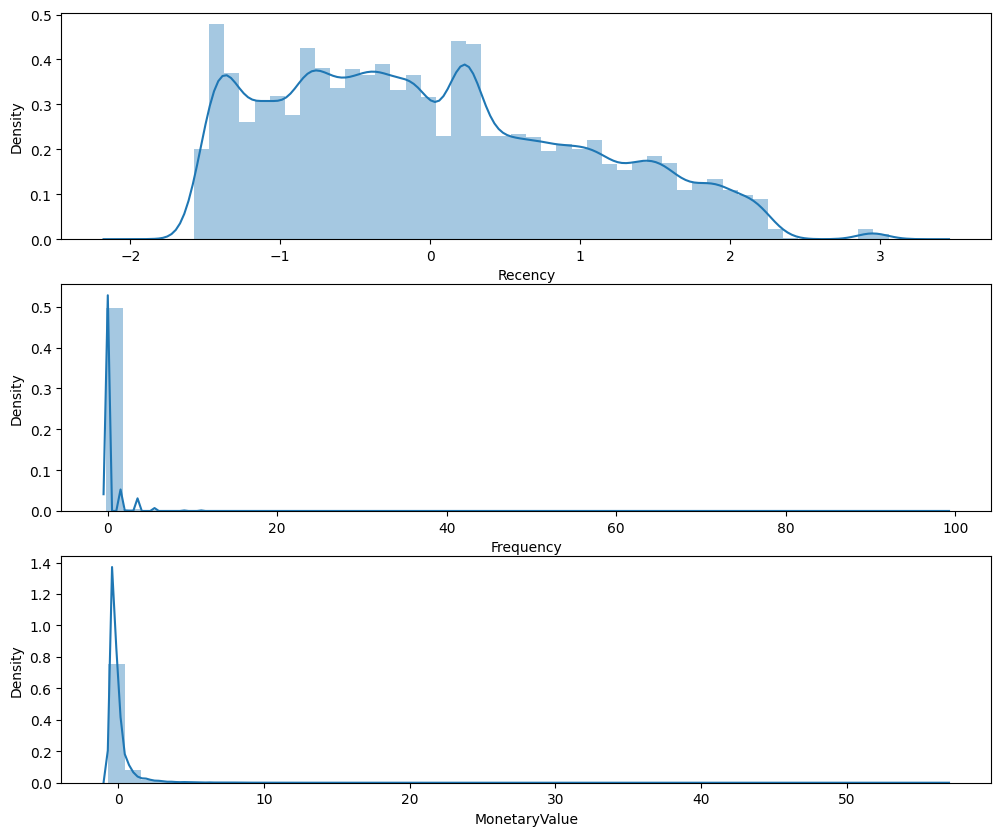

In [153]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_std['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df_std['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df_std['MonetaryValue'])
# Show the plot
plt.show()

In [151]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,96096.000000,96096.000000,96096.000000
mean,288.735691,1.096643,169.558320
std,153.414676,0.534676,237.929113
min,1.000000,1.000000,0.000000
25%,164.000000,1.000000,63.220000
50%,269.000000,1.000000,108.300000
75%,398.000000,1.000000,185.495000
max,773.000000,54.000000,13664.080000


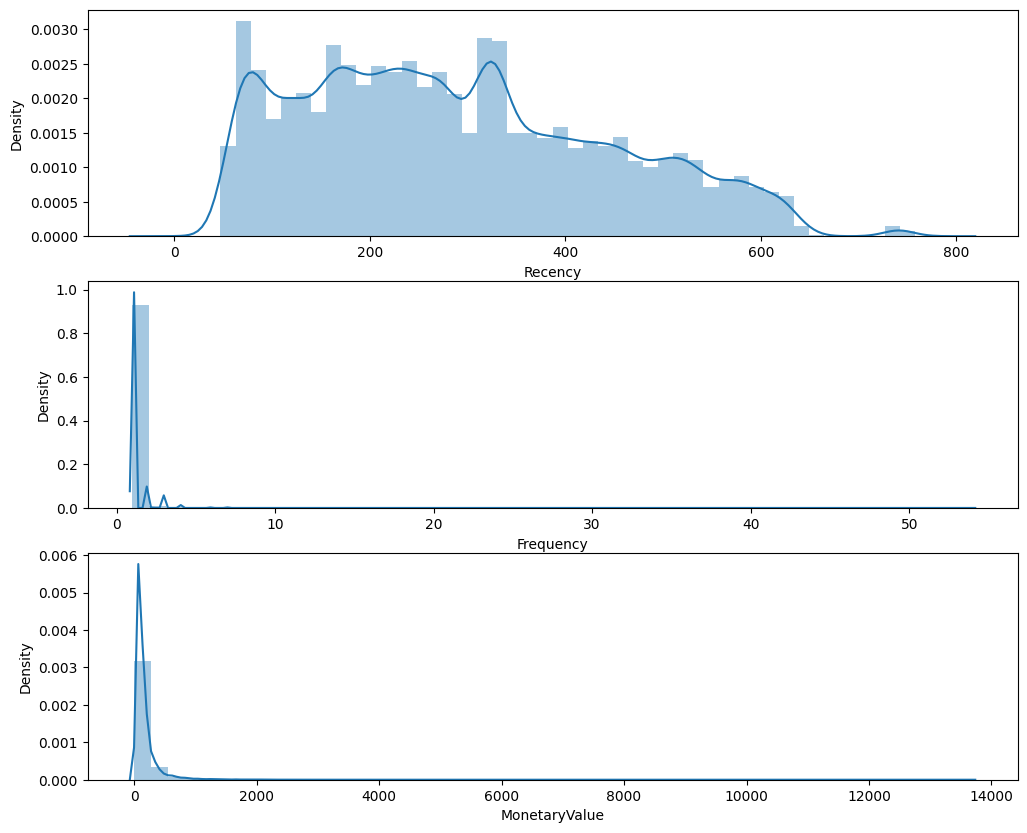

In [154]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

In [171]:
rfm['score_F'] = pd.cut(rfm['Frequency'] , bins=[0, 1, 15, 55], labels=[1,2,3])
rfm['score_R'] = pd.cut(rfm['Recency'] , bins=[0, 268, 397, 773], labels=[1,2,3])
rfm['score_M'] = pd.cut(rfm['MonetaryValue'] , bins=[0, 108, 185, 13665], labels=[1,2,3])
rfm

,customer_unique_id,Recency,Frequency,MonetaryValue,score_F,score_R,score_M
0,9a736b248f67d166d2fbb006bcb877c3,435,54,394.81,3,3,3
1,8af7ac63b2efbcbd88e5b11505e8098a,546,29,457.99,3,3,3
2,569aa12b73b5f7edeaa6f2a01603e381,498,26,62.68,3,3,1
3,1d2435aa3b858d45c707c9fc25e18779,639,24,233.70,3,3,3
4,90807fdb59eec2152bc977feeb6e47e7,327,24,215.70,3,2,3
...,...,...,...,...,...,...,...
96091,57cd75ea0d4df751cb635cbae8596411,374,1,158.09,1,2,2
96092,57cd06ab5e1452f461555dda1deb3d5c,257,1,124.27,1,1,2
96093,57cce8aaddd9bf6acc0d54ffdd68a0ac,84,1,350.34,1,1,3
96094,57cc19a7041c0fddd1b7a65dc03011c6,133,1,98.00,1,1,1


In [174]:
rfm["score_R"].value_counts()

1    47803
2    24180
3    24113
Name: score_R, dtype: int64

In [172]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,96096.000000,96096.000000,96096.000000
mean,288.735691,1.096643,169.558320
std,153.414676,0.534676,237.929113
min,1.000000,1.000000,0.000000
25%,164.000000,1.000000,63.220000
50%,269.000000,1.000000,108.300000
75%,398.000000,1.000000,185.495000
max,773.000000,54.000000,13664.080000


Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

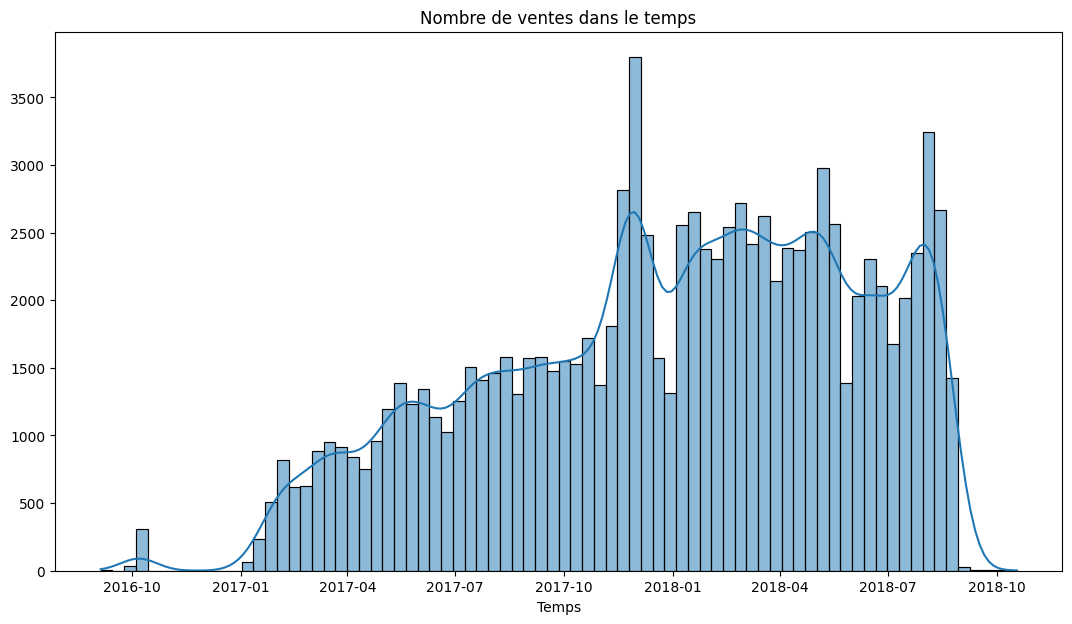

In [337]:
plt.subplots(figsize = (13 ,7))
sns.histplot(data = df, x = "order_purchase_timestamp",kde = True)
plt.title("Nombre de ventes dans le temps")
plt.xlabel("Temps")
plt.ylabel("")
plt.show()

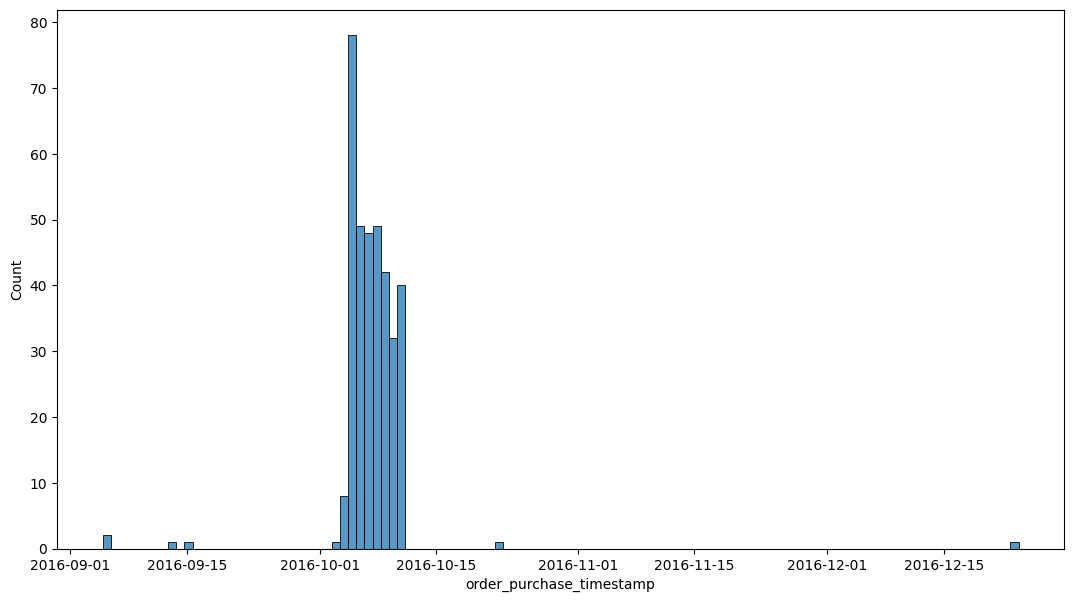

In [185]:
plt.subplots(figsize = (13 ,7))
sns.histplot(data = df[df["order_purchase_timestamp"].dt.year == 2016], x = "order_purchase_timestamp")
plt.show()

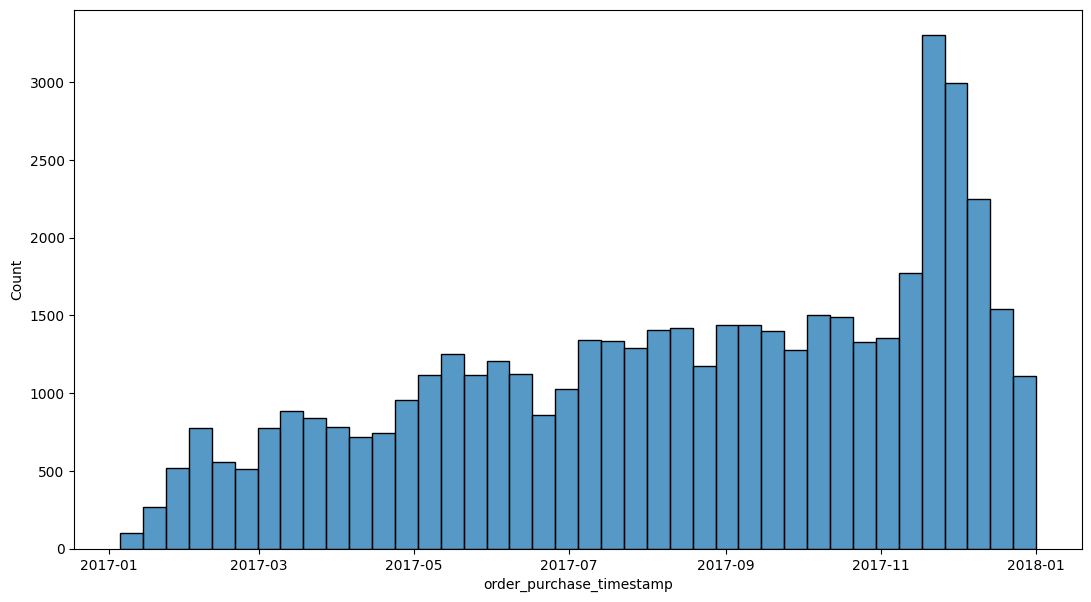

In [186]:
plt.subplots(figsize = (13 ,7))
sns.histplot(data = df[df["order_purchase_timestamp"].dt.year == 2017], x = "order_purchase_timestamp")
plt.show()

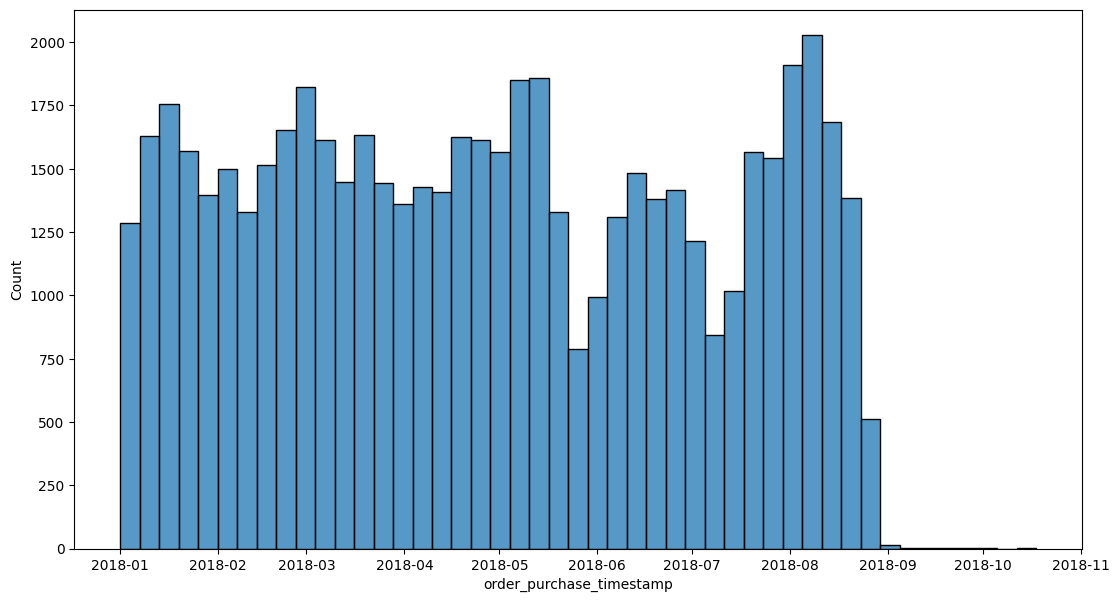

In [187]:
plt.subplots(figsize = (13 ,7))
sns.histplot(data = df[df["order_purchase_timestamp"].dt.year == 2018], x = "order_purchase_timestamp")
plt.show()

In [192]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [193]:
coord = pd.read_csv('data/worldcities.csv')

In [258]:
coord

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
40996,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
40997,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
40998,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
40999,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [262]:
for i in coord["city"].unique() :
    print(i)

Tokyo
Jakarta
Delhi
Mumbai
Manila
Shanghai
São Paulo
Seoul
Mexico City
Guangzhou
Beijing
Cairo
New York
Kolkāta
Moscow
Bangkok
Buenos Aires
Shenzhen
Dhaka
Lagos
Istanbul
Ōsaka
Karachi
Bangalore
Tehran
Kinshasa
Ho Chi Minh City
Los Angeles
Rio de Janeiro
Nanyang
Baoding
Chennai
Chengdu
Lahore
Paris
London
Linyi
Tianjin
Shijiazhuang
Zhoukou
Lima
Hyderābād
Handan
Bogotá
Weifang
Nagoya
Wuhan
Heze
Ganzhou
Tongshan
Chicago
Luanda
Changsha
Fuyang
Kuala Lumpur
Jining
Dongguan
Jinan
Foshan
Hanoi
Pune
Chongqing
Changchun
Zhumadian
Ningbo
Cangzhou
Nanjing
Hefei
Ahmedabad
Hong Kong
Zhanjiang
Shaoyang
Hengyang
Khartoum
Nantong
Yancheng
Nanning
Xi’an
Shenyang
Tangshan
Santiago
Zhengzhou
Shangqiu
Yantai
Riyadh
Dar es Salaam
Xinyang
Shangrao
Luoyang
Bijie
Quanzhou
Hangzhou
Miami
Huanggang
Maoming
Kunming
Nanchong
Zunyi
Jieyang
Lu’an
Yichun
Madrid
Changde
Taizhou
Liaocheng
Qujing
Sūrat
Baghdad
Qingdao
Singapore
Dallas
Dazhou
Suzhou
Xiangyang
Philadelphia
Giza
Nairobi
Nangandao
Ankara
Tai’an
Yulin
Dezho

In [264]:
coord[coord["city"] == "Santo André"]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1092,Santo André,Santo Andre,-23.6572,-46.5333,Brazil,BR,BRA,São Paulo,NaN,710210.0,1076625886


In [272]:
test = coord[["city", "lat", "lng"]]

In [273]:
test["city"] = test["city"].str.lower()

In [277]:
dff = df.replace({"sao paulo" : "são paulo do potengi" })

In [281]:
a = dff.merge(test,how = "outer", left_on = "customer_city", right_on= "city")
a

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,city,lat,lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,são paulo do potengi,SP,housewares,são paulo do potengi,-5.8950,-35.7628
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,são paulo do potengi,SP,housewares,são paulo do potengi,-5.8950,-35.7628
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,são paulo do potengi,SP,housewares,são paulo do potengi,-5.8950,-35.7628
3,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-19 14:04:48,credit_card,1.0,114.13,4.0,782987b81c92239d922aa49d6bd4200b,4278.0,são paulo do potengi,SP,computers_accessories,são paulo do potengi,-5.8950,-35.7628
4,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-30 15:52:25,credit_card,3.0,32.70,5.0,e2dfa3127fedbbca9707b36304996dab,4812.0,são paulo do potengi,SP,bed_bath_table,são paulo do potengi,-5.8950,-35.7628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151955,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tukchi,57.3670,139.5000
151956,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numto,63.6667,71.3333
151957,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nord,81.7166,-17.8000
151958,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,timmiarmiut,62.5333,-42.2167


In [284]:
df["customer_state"].value_counts()

SP    44245
RJ    13744
MG    12286
RS     5792
PR     5324
SC     3797
BA     3656
DF     2236
GO     2157
ES     2129
PE     1747
CE     1410
PA     1023
MT      969
MA      776
MS      751
PB      572
PI      528
RN      527
AL      431
SE      362
TO      302
RO      263
AM      155
AC       85
AP       70
RR       46
Name: customer_state, dtype: int64

In [288]:
import geopandas as gpd

In [290]:
info = gpd.read_file('data/bcim_2016_21_11_2018.gpkg', layer = "lim_unidade_federacao_a")

In [291]:
info

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,NaN,Sim,GO,52,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,NaN,Sim,MS,50,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,NaN,Sim,PR,41,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,NaN,Sim,MG,31,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,NaN,Sim,SE,28,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,Alagoas,NaN,Sim,AL,27,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,Tocantins,NaN,Sim,TO,17,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,Roraima,NaN,Sim,RR,14,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,Amazonas,NaN,Sim,AM,13,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,Acre,NaN,Sim,AC,12,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


In [314]:
order_state = df.groupby("customer_state")["order_id"].count().to_frame().reset_index()

In [315]:
order_state

,customer_state,order_id
0,AC,85
1,AL,431
2,AM,155
3,AP,70
4,BA,3656
5,CE,1410
6,DF,2236
7,ES,2129
8,GO,2157
9,MA,776


In [312]:
info.rename({"sigla"  : "customer_state"}, axis = 1, inplace = True)
bla = info.merge(order_state, on = "customer_state", how = "left")

In [316]:
bla[["order_id","customer_state", "geometry"]]

,order_id,customer_state,geometry
0,2157,GO,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,751,MS,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,5324,PR,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,12286,MG,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,362,SE,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."
5,431,AL,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ..."
6,302,TO,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ..."
7,46,RR,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5..."
8,155,AM,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1..."
9,85,AC,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ..."


Text(0.5, 1.0, 'Nombre de vente par état')

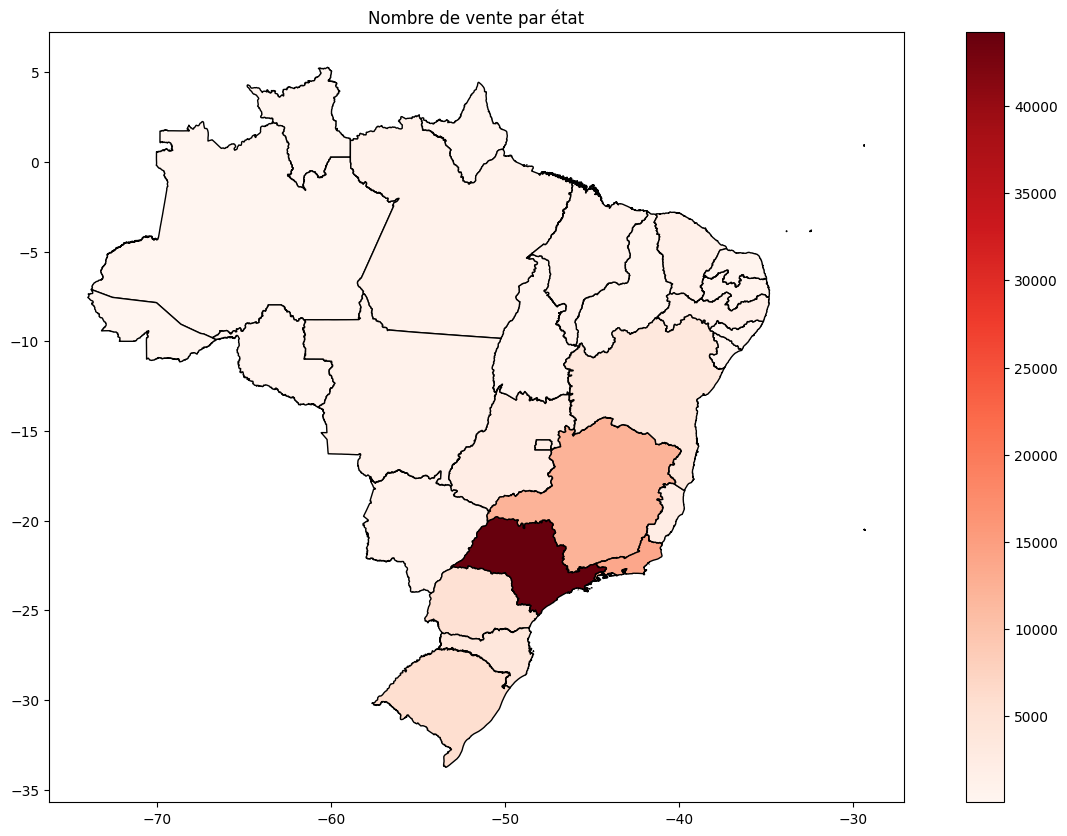

In [338]:
bla.plot(column = "order_id",
        cmap = "Reds",
        figsize = (16,10),
        legend = True,
        edgecolor = "black")
plt.title("Nombre de vente par état")

In [446]:
top10_volume = df["product_category_name_english"].value_counts().head(5)

In [365]:
top10_volume.index

Index(['bed_bath_table', 'health_beauty', 'sports_leisure',
       'computers_accessories', 'furniture_decor', 'housewares',
       'watches_gifts', 'telephony', 'auto', 'toys'],
      dtype='object')

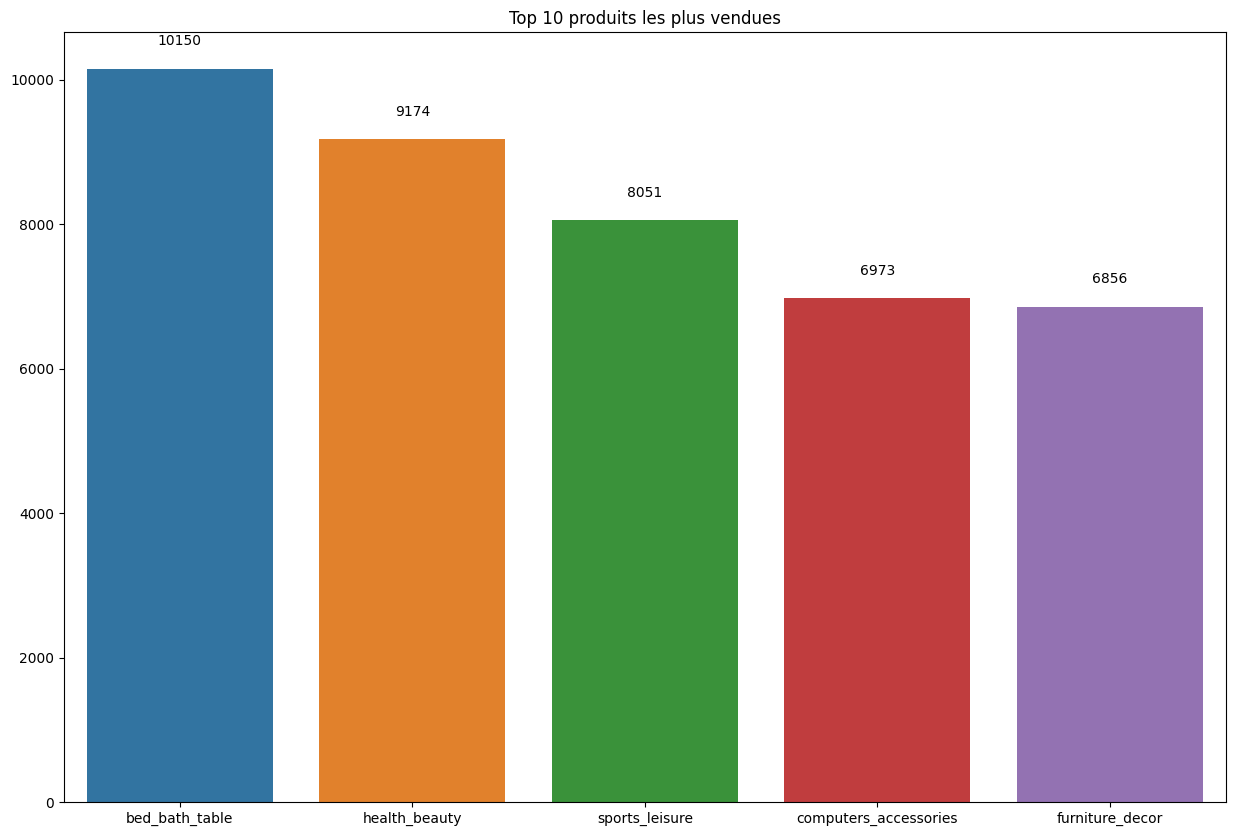

In [448]:
fig, ax = plt.subplots(figsize = (15,10))
barchart = sns.barplot( x = top10_volume.index, y = top10_volume.values)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.title("Top 10 produits les plus vendues")
plt.show()

In [439]:
top10_ca = df.groupby("product_category_name_english")["payment_value"].sum().sort_values(ascending = False).tail(5)

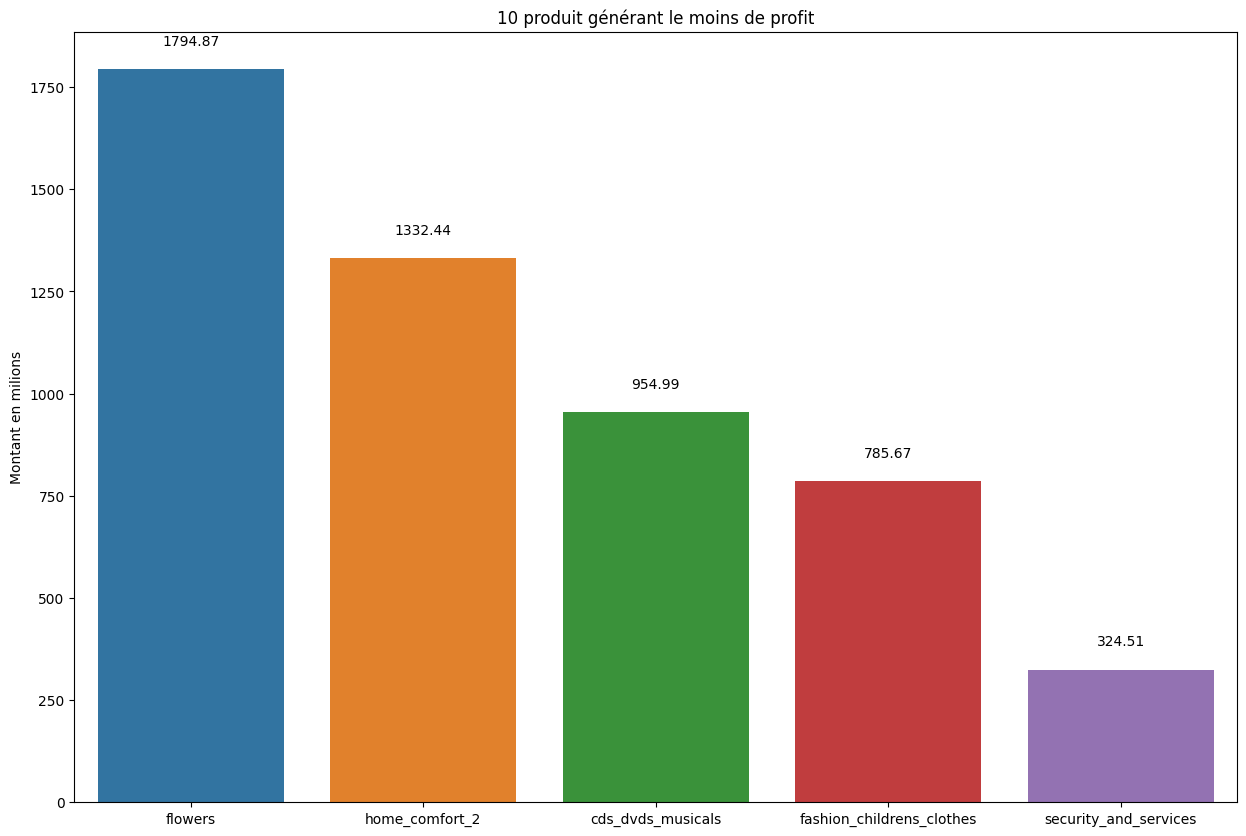

In [441]:
fig, ax = plt.subplots(figsize = (15,10))
barchart = sns.barplot(x = top10_ca.index, y = top10_ca.values)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.xlabel("")
plt.ylabel("Montant en milions")
plt.title("10 produit générant le moins de profit")
plt.show()

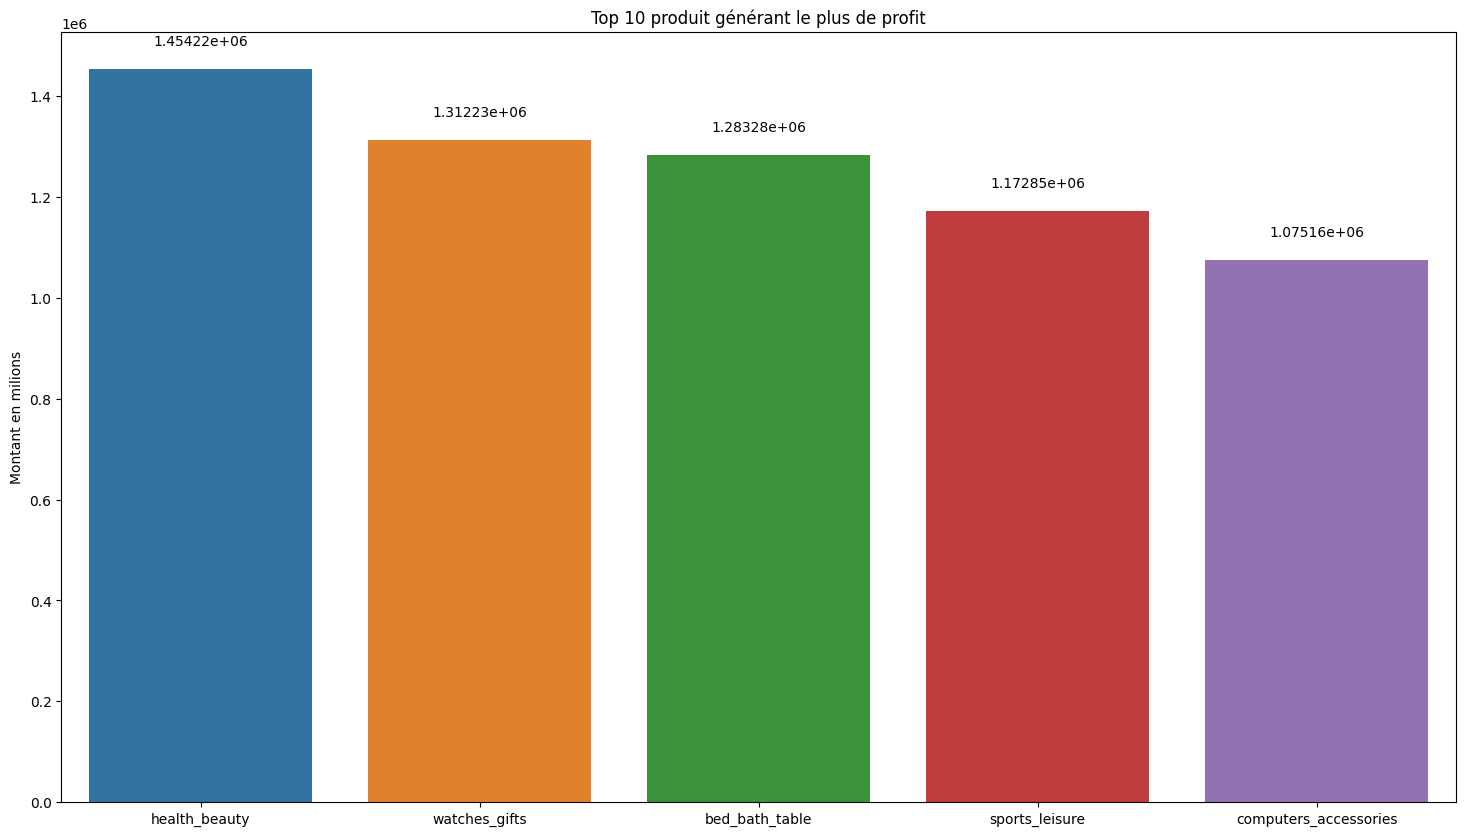

In [442]:
top10_ca = df.groupby("product_category_name_english")["payment_value"].sum().sort_values(ascending = False).head(5)
fig, ax = plt.subplots(figsize = (18,10))
barchart = sns.barplot(x = top10_ca.index, y = top10_ca.values)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.xlabel("")
plt.ylabel("Montant en milions")
plt.title("Top 10 produit générant le plus de profit")
plt.show()

In [417]:
df["delivery time"] = df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
df["delivery time"] = df["delivery time"].astype("str").str.split(' ').str[0]

In [438]:
df["product_category_name_english"].value_counts()

bed_bath_table               10150
health_beauty                 9174
sports_leisure                8051
computers_accessories         6973
furniture_decor               6856
                             ...  
arts_and_craftmanship           23
la_cuisine                      15
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [418]:
df.groupby("customer_unique_id")

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,delivery time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,8
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,8
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,8
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery,13
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty,8
105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby,22
105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2,24
105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories,17


In [431]:
df["delivery time"].replace('NaT', np.nan).fillna(0).astype(int).mean().round(2)

11.72

In [458]:
top5_client = df.groupby("customer_unique_id")["payment_value"].sum().sort_values(ascending = False).head(5)

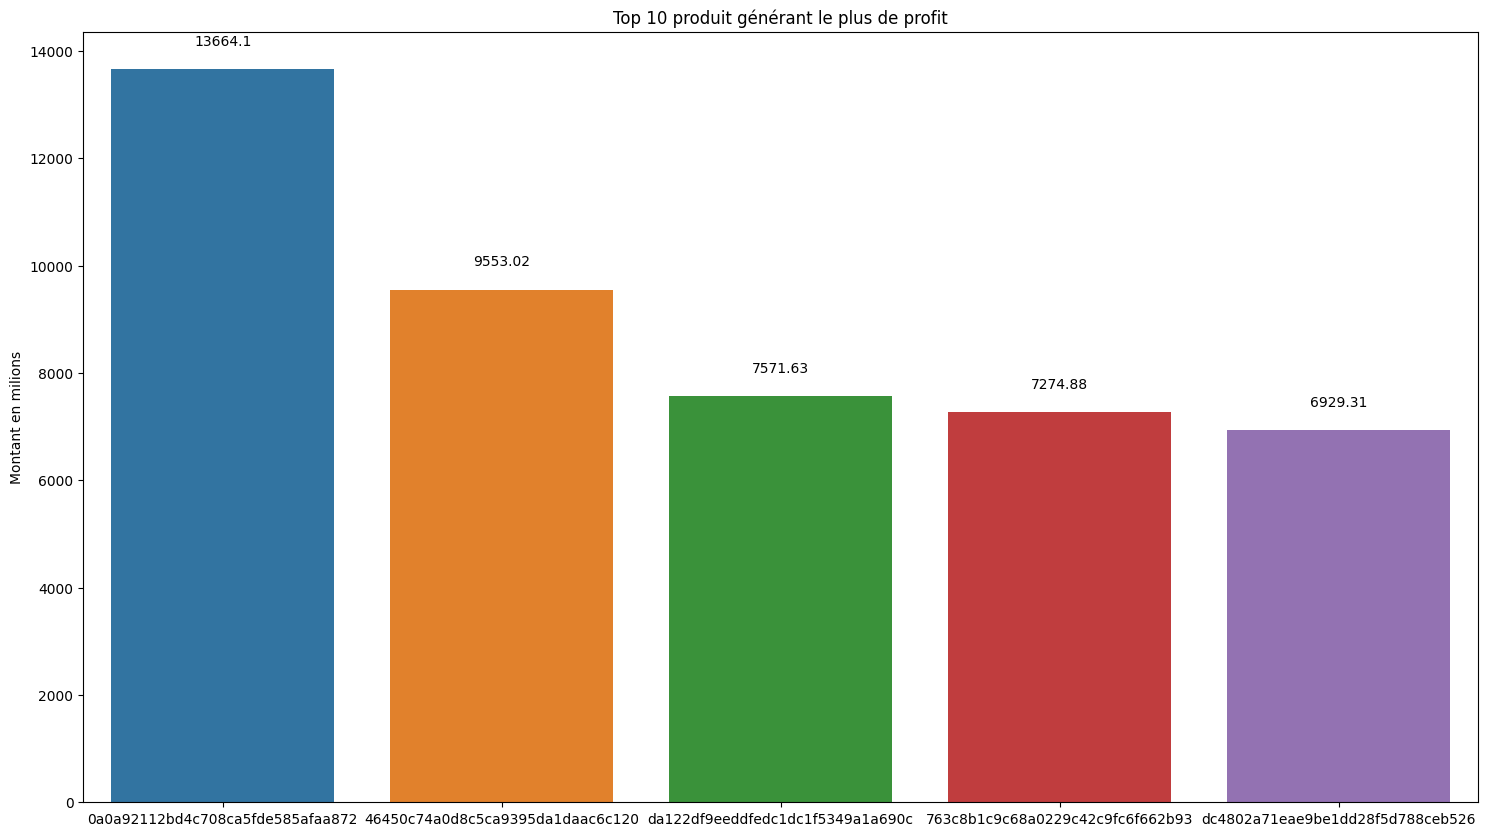

In [459]:
top5_client = df.groupby("customer_unique_id")["payment_value"].sum().sort_values(ascending = False).head(5)
fig, ax = plt.subplots(figsize = (18,10))
barchart = sns.barplot(x = top5_client.index, y = top5_client.values)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.xlabel("")
plt.ylabel("Montant en milions")
plt.title("Top 10 produit générant le plus de profit")
plt.show()

Now that you have clusters for each category, explain the different buying behaviors

In [474]:
topsup2

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,delivery time
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,8
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares,8
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30,credit_card,1.0,8.34,5,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,office_furniture,18
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,voucher,1.0,24.86,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony,13
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,credit_card,1.0,5.96,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN,NaT
105359,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-06 16:58:25,credit_card,4.0,49.75,4,39fff7cb5873a7116b02234bd1e6c6dc,11320,sao vicente,SP,health_beauty,4
105367,19dba6d1e58b04e7fc820558a38ea398,cf97e9cf454480b303de6736ddd15fd6,delivered,2018-05-12 13:42:24,2018-05-18 17:18:29,credit_card,1.0,104.79,5,9e4accf95024aa6565ca1efcadb96752,8550,poa,SP,watches_gifts,6
105374,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-20 20:25:45,voucher,1.0,64.37,5,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,toys,16


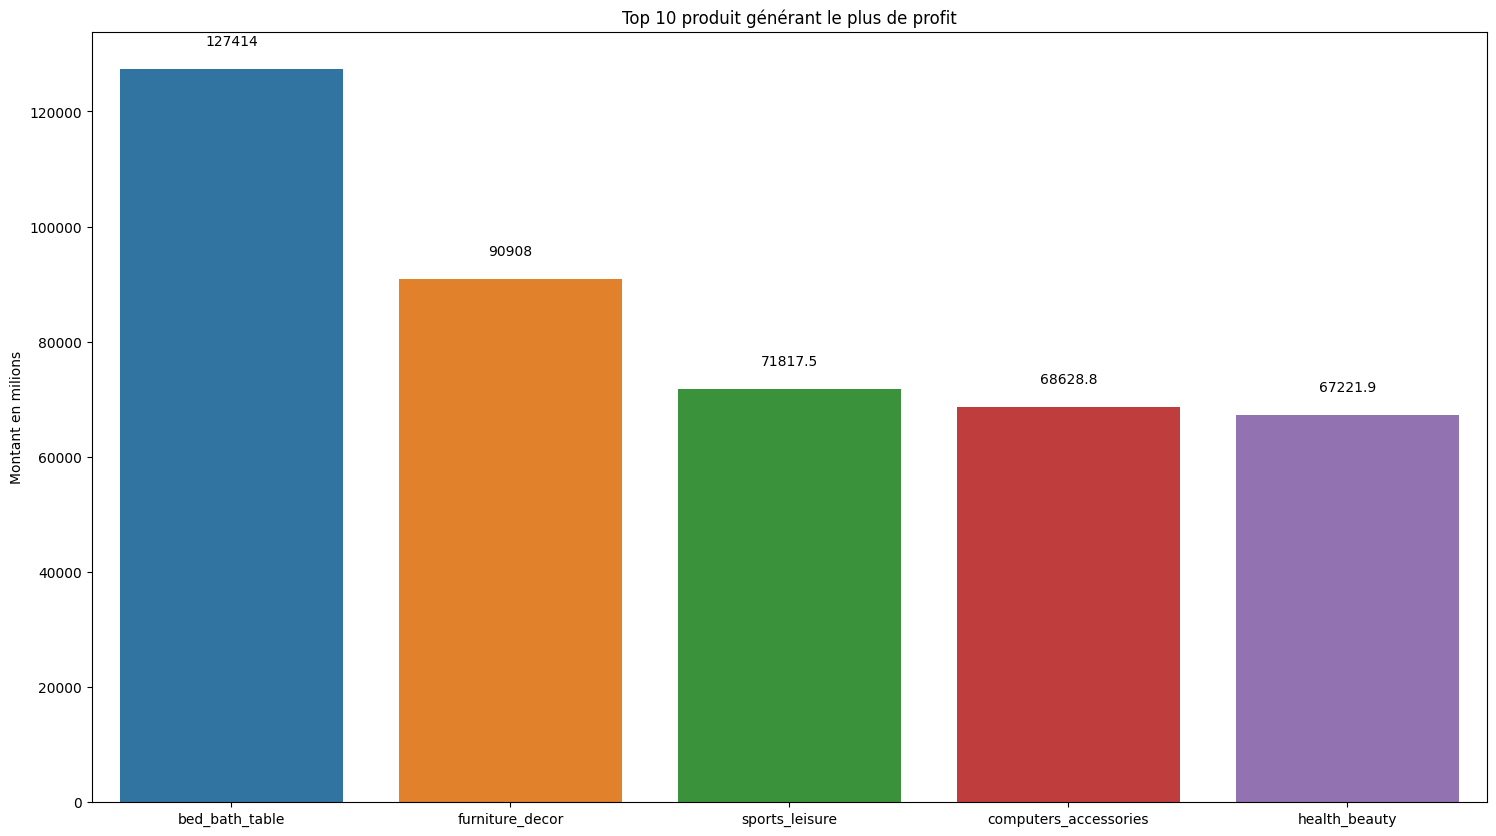

In [476]:
ttopsup2 = df[df["customer_unique_id"].duplicated()] 
topsup2 = ttopsup2.groupby("product_category_name_english")["payment_value"].sum().sort_values(ascending = False).head(5)
fig, ax = plt.subplots(figsize = (18,10))
barchart = sns.barplot(x = topsup2.index, y = topsup2.values)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.xlabel("")
plt.ylabel("Montant en milions")
plt.title("Top 10 produit générant le plus de profit")
plt.show()

In [486]:
df["review_score"].mean()

4.059848362639135

In [485]:
df.groupby("customer_city")["payment_value"].sum().sort_values()

customer_city
sabaudia                             20.42
polo petroquimico de triunfo         20.70
jenipapo de minas                    22.58
tamboara                             24.09
santo antonio do rio abaixo          24.23
                                   ...    
curitiba                         250247.84
brasilia                         360098.81
belo horizonte                   428603.41
rio de janeiro                  1182281.91
sao paulo                       2247977.27
Name: payment_value, Length: 4119, dtype: float64

In [490]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
delivery time                       0
dtype: int64

In [515]:
po = df[df["product_category_name_english"].isna() & df["order_delivered_customer_date"].isna()]
po

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,delivery time
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN,NaT
284,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,NaT,credit_card,5.0,84.00,1,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaT
624,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,NaT,credit_card,1.0,97.68,3,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaT
733,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,NaT,boleto,1.0,132.46,1,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaT
784,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,NaT,boleto,1.0,134.38,1,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105188,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,NaT,boleto,1.0,210.09,1,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaT
105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN,NaT
105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN,NaT
105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaT,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaT


In [499]:
po["review_score"].value_counts()

1    635
2     85
5     83
3     61
4     35
Name: review_score, dtype: int64

In [516]:
p = df[df["order_delivered_customer_date"].isna() ]
p

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,delivery time
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN,NaT
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,NaT,boleto,1.0,22.36,1,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,health_beauty,NaT
111,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,NaT,boleto,1.0,50.35,3,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC,christmas_supplies,NaT
137,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,NaT,credit_card,2.0,138.28,5,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP,perfumery,NaT
164,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,NaT,boleto,1.0,69.12,2,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,perfumery,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN,NaT
105250,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,NaT,boleto,1.0,144.56,1,965191786b70912f793e4a777fd623cd,13050,campinas,SP,watches_gifts,NaT
105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN,NaT
105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaT,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaT


In [514]:
p["review_score"].value_counts()

1    2212
5     292
2     248
3     242
4     165
Name: review_score, dtype: int64

In [524]:
p = df[df["product_category_name_english"].isna() ]
p

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,delivery time
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT,credit_card,1.0,65.95,2,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,NaN,NaT
115,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-02-09 20:16:40,credit_card,1.0,42.40,5,34c58672601f2c6d29db7efd1f6bf958,38650,bonfinopolis de minas,MG,NaN,12
193,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-21 21:16:17,credit_card,5.0,124.16,5,5cbf29b2dcf212a6a5d864b887238c72,4842,sao paulo,SP,NaN,8
243,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22 13:48:18,2017-05-02 15:45:27,credit_card,3.0,34.24,4,1268b060098ed3f22c2e7c34cc72a1a8,38240,itapagipe,MG,NaN,10
281,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08 18:56:45,2018-02-19 13:28:50,credit_card,1.0,132.05,5,f5cb81f98962f7504bef1e75579b6dff,13474,americana,SP,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105188,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,NaT,boleto,1.0,210.09,1,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaT
105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN,NaT
105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN,NaT
105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaT,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaT


In [520]:
p["review_score"].value_counts()

5    910
1    847
4    351
3    166
2    136
Name: review_score, dtype: int64

In [521]:
847/2410

0.3514522821576763

# Working with cohorts

❓What is a cohort? 

❓Why is it interesting to analyse cohorts ? 

❓What data (already existing in the original dataset) do we need to build a cohort? 

Build a new df with just these 3 features

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [ ]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'},inplace=True)

df_c = df_c[df_c['na'].notna()]

In [ ]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

Explore a cohort (for example 2017-01) and try to understand what it shows

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

Plot your `retention matrix` using the code below : 

NameError: name 'retention_matrix' is not defined

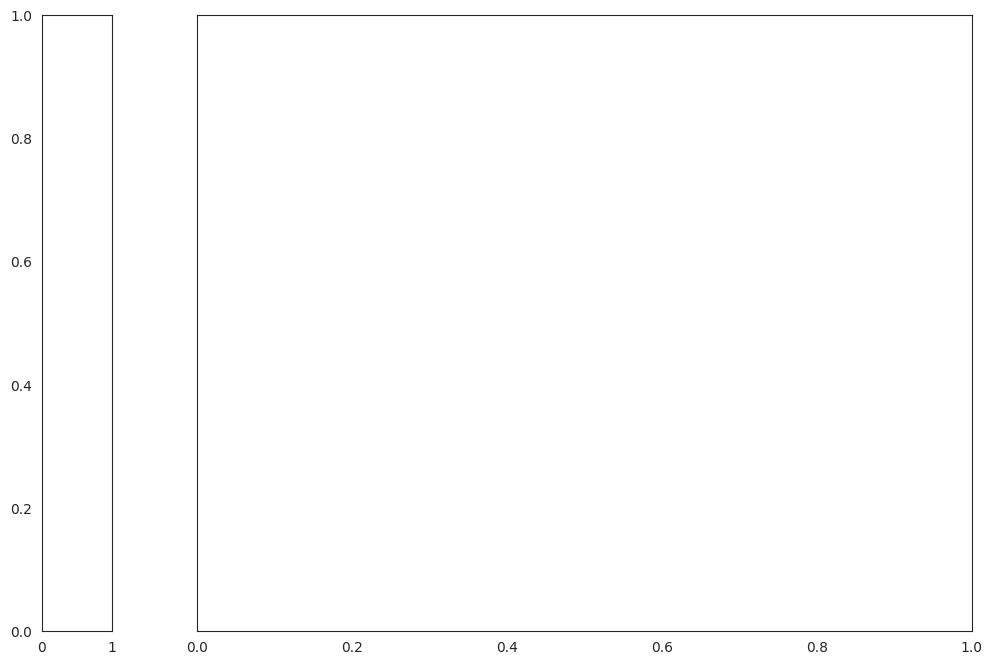

In [125]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

In [124]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

AttributeError: Can only use .dt accessor with datetimelike values